# Banking Customer Churn Prediction

### 1. Dataset

This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It comprises information on 10,000 bank customers hailing from three distinct countries: Spain, Germany, and France. Among these customers, 2037 have exited the bank, providing valuable insights into churn dynamics across multiple geographical regions.

#### 1.1. Machine learning problem

Exploring and understanding the underlying patterns and behaviors that contribute to customer churn is essential. By analyzing various factors such as demographics, account activity, transaction history, customer service interactions, and product usage, we can gain insights into the drivers of churn.

Through this comprehensive analysis, we aim to develop predictive models that accurately identify customers at risk of churning, enabling proactive retention strategies and ultimately improving customer retention rates for the bank.

To accomplish this objective, we will leverage supervised learning model, which learn patterns from labeled data to make predictions. This model will be trained on historical data where the churn status of customers is known, allowing them to discern patterns and relationships between various features and churn outcomes.

#### 1.2. Database features

| Attribute               | Description                                                          |
| ----------------------- | -------------------------------------------------------------------- |
| **A - RowNumber**       | The sequential number assigned to each row in the dataset.           |
| **B - CustomerId**      | A unique identifier for each customer.                               |
| **C - Surname**         | The surname of the customer.                                         |
| **D - CreditScore**     | The credit score of the customer.                                    |
| **E - Geography**       | The geographical location of the customer.                           |
| **F - Gender**          | The gender of the customer.                                          |
| **G - Age**             | The age of the customer.                                             |
| **H - Tenure**          | The number of years the customer has been with the bank.             |
| **I - Balance**         | The account balance of the customer.                                 |
| **J - NumOfProducts**   | The number of bank products the customer has.                        |
| **K - HasCrCard**       | Indicates whether the customer has a credit card (binary: yes/no).   |
| **L - IsActiveMember**  | Indicates whether the customer is an active member (binary: yes/no). |
| **M - EstimatedSalary** | The estimated salary of the customer.                                |
| **N - Exited**          | Indicates whether the customer has exited the bank (binary: yes/no). |


<br>

------

### 2. Import libraries


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, make_scorer


------

### 3. Data analysis


Before proceeding further, we will analyze the data to gain a better understanding of its characteristics. In this section, we will explore each feature in detail and examine its relationship with the churn status.


In [2]:
# Read the dataset
dataframe = pd.read_csv('../dataset/Churn_Modelling.csv')

dataframe.describe()

def saveDataframe(dataframe, fileName):
    newFile = open("../dataset/" + fileName, 'w')
    dataframe.to_csv(newFile, index=False)
    newFile.close()

#### 3.1. Credit score

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


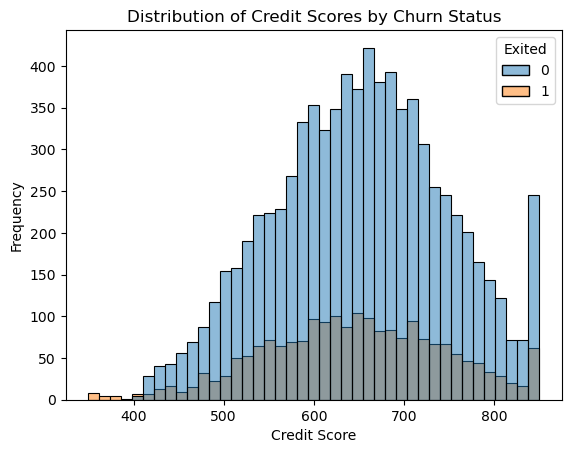

In [3]:
# Plot the distribution of credit scores by churn status
sb.histplot(data=dataframe, x='CreditScore', hue='Exited')
plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The credit score follows a normal distribution along the dataset, which suggests that it is evenly distributed across the range of values, without any significant skewness or outliers.

#### 3.2. Geography


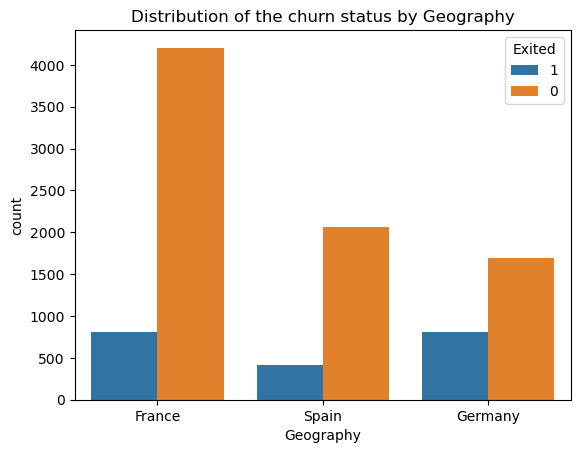

Geography,France,Germany,Spain
Exited,,,
0,83.845233,67.556796,83.326605
1,16.154767,32.443204,16.673395


In [4]:
dataframe['Exited'] = dataframe['Exited'].astype(str)

# Plot the distribution of the churn status by geography
sb.countplot(x='Geography', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Geography')
plt.show()

# Plot the distribution of the churn status in percentage by geography
pd.crosstab(dataframe['Exited'], dataframe['Geography'], normalize = 'columns')* 100

**Observations:**

The distribution of customers across different geographic locations reveals that approximately 50% of the customers belong to France, while 25% each belong to Germany and Spain. 

Despite the expectation that customer churn should not be influenced by geographic location, the data shows that around 32% of customers from Germany have churned. This suggests that there may be underlying factors specific to Germany that contribute to a higher churn rate among its customers.

#### 3.3. Gender


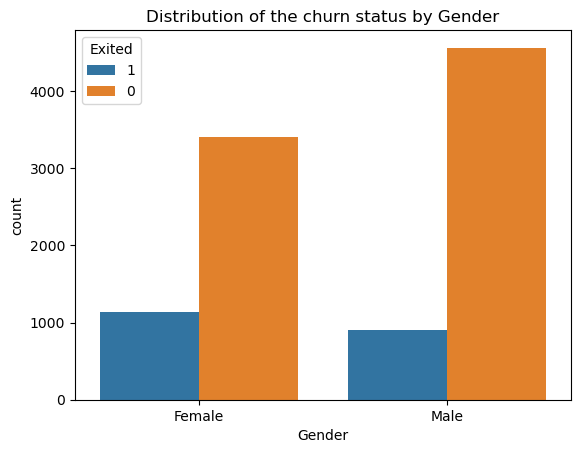

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


In [5]:
# Plot the distribution of the churn status by gender
sb.countplot(x='Gender', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Gender')
plt.show()

# Plot the distribution of the churn status in percentage by gender
pd.crosstab(dataframe['Exited'], dataframe['Gender'], normalize = 'columns')* 100

**Observations:**

Based on the data, it appears that females have a higher churn rate compared to males, with a churn rate of 25%. This suggests that gender may be a factor influencing customer churn, with females being more likely to churn than males. 

#### 3.4. Age


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


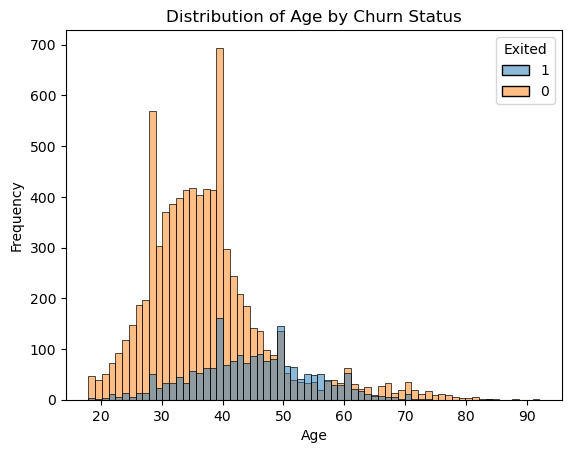

In [6]:
sb.histplot(data=dataframe, x='Age', hue='Exited')
plt.title('Distribution of Age by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The distribution of ages within the dataset appears to be slightly right-skewed, indicating that there are relatively fewer older customers compared to younger ones.

Additionally, there seems to be a noticeable trend in churn status with respect to age. Specifically, there is a tendency for the churn rate to increase after the age of 35. This suggests that older customers, particularly those over 35 years old, may be more likely to churn compared to younger customers. 

#### 3.5. Tenure


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


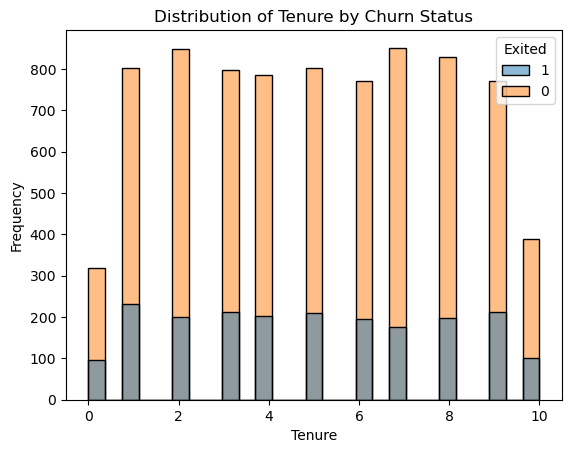

In [7]:
sb.histplot(data=dataframe, x='Tenure', hue='Exited')
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The distribution of tenure exhibits an irregular form, indicating that there isn't a clear relationship between tenure (the length of time a customer has been with the bank) and customer churn. This suggests that customer churn may not be strongly influenced by the duration of their tenure with the bank.

#### 3.6. Balance


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


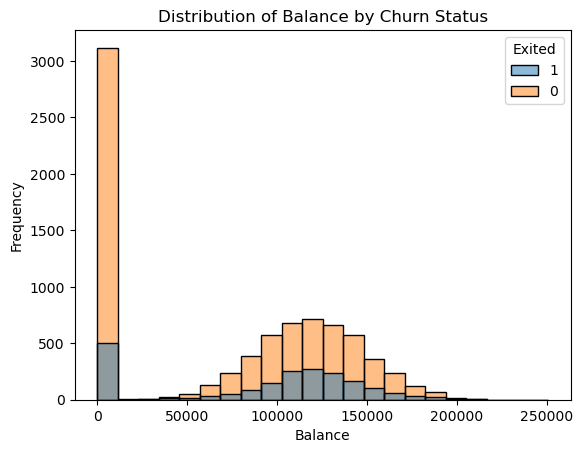

In [8]:
sb.histplot(data=dataframe, x='Balance', hue='Exited')
plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The balance variable follows a normal distribution for values greater than 0, with values ranging between 50,000 and 200,000. 

#### 3.7. Number of products

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


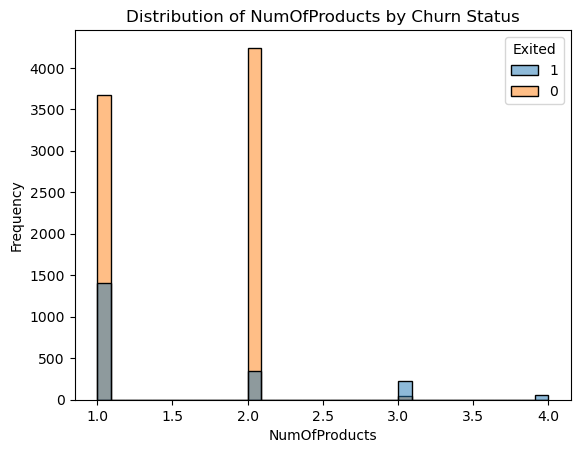

In [9]:
sb.histplot(data=dataframe, x='NumOfProducts', hue='Exited')
plt.title('Distribution of NumOfProducts by Churn Status')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The analysis indicates a significant relationship between the number of products and the customer churn rate. Specifically, customers with only one product have the highest churn rate. 

This suggests that the number of products a customer has may influence their likelihood of churning, with customers holding fewer products being more prone to churn.

#### 3.8. Credit card

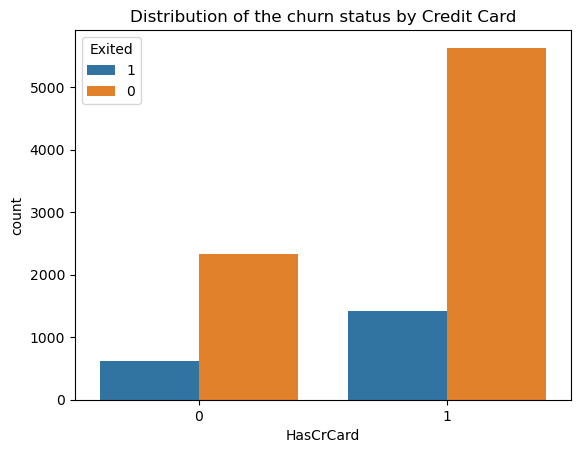

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


In [10]:
sb.countplot(x='HasCrCard', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Credit Card')
plt.show()

pd.crosstab(dataframe['Exited'], dataframe['HasCrCard'], normalize = 'columns')* 100

**Observations:**

The analysis reveals that the percentage of churn customers is similar regardless of whether they have a credit card. 

This suggests that having a credit card or not has no discernible effect on the customer churn status.

#### 3.9. Active member

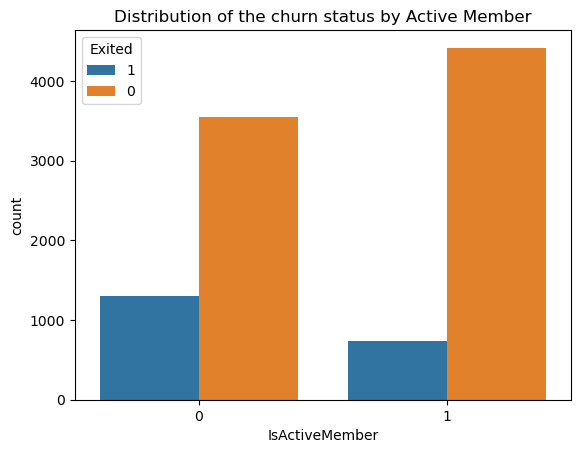

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


In [11]:
sb.countplot(x='IsActiveMember', hue='Exited', data=dataframe)
plt.title('Distribution of the churn status by Active Member')
plt.show()

pd.crosstab(dataframe['Exited'], dataframe['IsActiveMember'], normalize = 'columns')* 100

**Observations:**

Non-active members are more likely to churn, with a churn rate of 26.85%, compared to active members, who have a churn rate of 14.26%. This indicates that the level of activity of a customer within the bank's services may influence their likelihood of churning. 

#### 3.10. Estimated salary

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


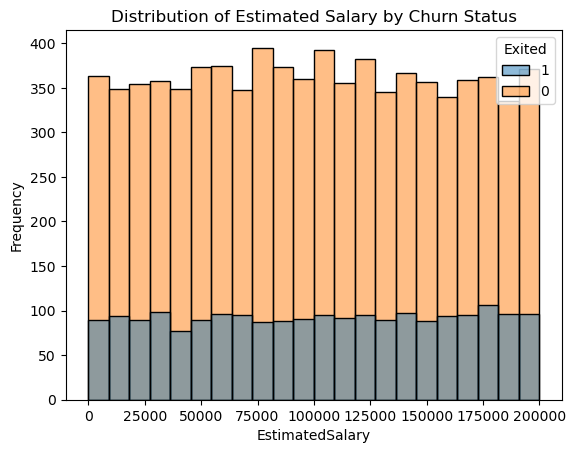

In [12]:
sb.histplot(data=dataframe, x='EstimatedSalary', hue='Exited')
plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

**Observations:**

The Estimated salary variable follows a normal distribution, indicating that salaries are evenly distributed across the dataset. However, despite this distribution, the estimated salary does not appear to have a significant effect on customer churn status.

It's worth noting that the salary varies from 0 to 200,000, suggesting that there might be some noise in the dataset. This wide range of salary values could potentially introduce variability into the analysis and make it more challenging to identify clear patterns or relationships between salary and churn status. 

---

### 4. Data preprocessing



#### 4.1. Dimensionality reduction and Feature subset selection

We initiated the preprocessing phase by removing certain columns that are not beneficial for predictive analysis. Specifically, we eliminated the following columns:

- **RowNumber**: This column merely represents the row index and does not contain any meaningful information that could aid in the prediction process.
- **CustomerId**: Although this identifier is unique to each customer, it does not provide any intrinsic value related to the customer's churn status.
- **Surname**: The surname of a customer, while unique, does not contribute significant predictive power for our models.

In [13]:
dataframe.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

By excluding these columns, we reduce noise and potential overfitting in our models, allowing the algorithms to focus on the most relevant features for accurate predictions.

#### 4.2. Label encoding and binarization

Most machine learning algorithms require numerical input, so we transformed categorical variables into numerical values:

In [14]:
dataframe['Gender'] = (dataframe['Gender'] == "Male").astype(int)

countries = {'France': 0, 'Spain': 1, 'Germany': 2}
dataframe['Geography'] = dataframe['Geography'].map(countries)

#### 4.3. Attribute transformation 

As stated previously, we identified inconsistencies in the **EstimatedSalary** attribute, where some values appeared unrealistically low, potentially due to being input as monthly salaries rather than annual salaries. To address this, we applied the following transformation:

- **Salary Adjustment**: For each country in our dataset, we determined the minimum annual salary threshold based on real-world data. If an "EstimatedSalary" value for a customer was found to be below this threshold, we transformed it to represent an annual salary. Specifically, we multiplied these suspiciously low values by 12 to convert them from a monthly to an annual salary format. 

In [15]:
dataframe = dataframe[dataframe['EstimatedSalary'] >= 1000]

country_salaries = {'France': 1540 * 12, 'Spain': 1050 * 12, 'Germany': 1580 * 12}
dataframe.loc[dataframe['EstimatedSalary'] < dataframe['Geography'].map(country_salaries), 'EstimatedSalary'] *= 12

This adjustment ensured that all salary values in our dataset are consistent and realistic, improving the quality and reliability of the feature for our machine learning models.

#### 4.4. Scaling

Scaling is a crucial preprocessing step in machine learning that standardizes the range of the independent variables or features of data. It ensures that each feature contributes equally to the model's calculations, preventing features with larger scales from dominating the learning process. 

In [16]:
saveDataframe(dataframe, 'dataset_noScale_noSmote.csv')

X = dataframe.drop('Exited', axis=1)
y = dataframe['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

scale_dataframe = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
scale_dataframe['Exited'] = scale_dataframe['Exited'].astype(int)
saveDataframe(scale_dataframe, 'dataset_scale_noSmote.csv')

X_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326037,-0.903218,-1.096476,0.294442,-1.040876,-1.227046,-0.911465,0.645994,0.971339,0.011685
1,-0.439881,0.301517,-1.096476,0.199080,-1.386709,0.116473,-0.911465,-1.548002,0.971339,0.207506
2,-1.536926,-0.903218,-1.096476,0.294442,1.034127,1.332466,2.524589,0.645994,-1.029507,0.231804
3,0.501921,-0.903218,-1.096476,0.008355,-1.386709,-1.227046,0.806562,-1.548002,-1.029507,-0.119908
4,2.064692,0.301517,-1.096476,0.389805,-1.040876,0.785010,-0.911465,0.645994,0.971339,-0.377811



#### 4.5. Sampling


<Axes: xlabel='Exited', ylabel='count'>

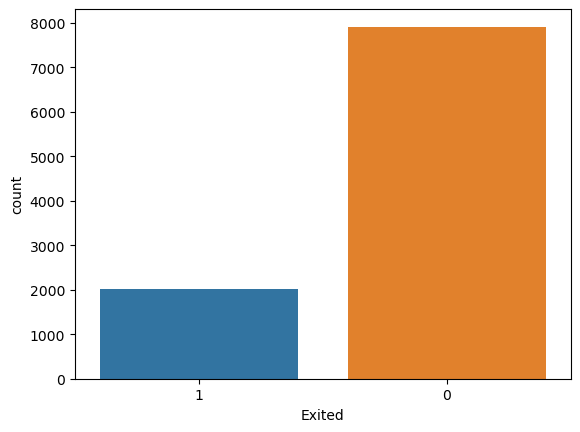

In [17]:
sb.countplot(x='Exited', data=dataframe)

Upon analyzing the customer churn status distribution, we observed an imbalance in the dataset: only 20% of customers had exited the bank. This imbalance can lead to biased and misleading results, as machine learning models may become biased towards the majority class (non-churners).

To address this issue, we employed the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE is a method used to create synthetic samples of the minority class (customers who exited the bank) by interpolating between existing samples. This process helps to even out the dataset, leading to a more balanced distribution of the target variable. 


<Axes: xlabel='Exited', ylabel='count'>

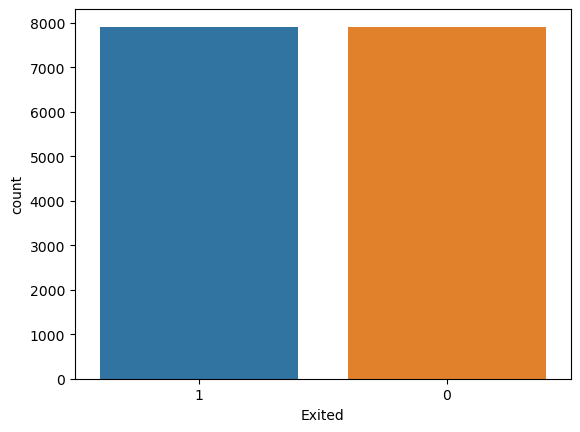

In [18]:
smt = SMOTE(random_state=5)

# smote the dataset without scaling
X_s, y_s = smt.fit_resample(X, y)
dataframe = pd.concat([X_s, y_s], axis=1)
saveDataframe(dataframe, 'dataset_noScale_smote.csv')

# smote the dataset with scaling
X_smote, y_smote = smt.fit_resample(X_scaled, y)
dataframe = pd.concat([X_smote, y_smote], axis=1)
saveDataframe(dataframe, 'dataset_scale_smote.csv')

sb.countplot(x='Exited', data=dataframe)

By applying SMOTE, we ensured that our dataset became more balanced, thereby allowing our machine learning models to learn more effectively from the data without being biased towards the majority class. This, in turn, improved the accuracy and robustness of our predictive models.

#### 4.6. Correlation matrix

Computing the correlation matrix is a fundamental step in exploring the relationships between variables within our dataset. This matrix provides valuable insight into how each variable is related to every other variable, helping us understand the direction and strength of these relationships.

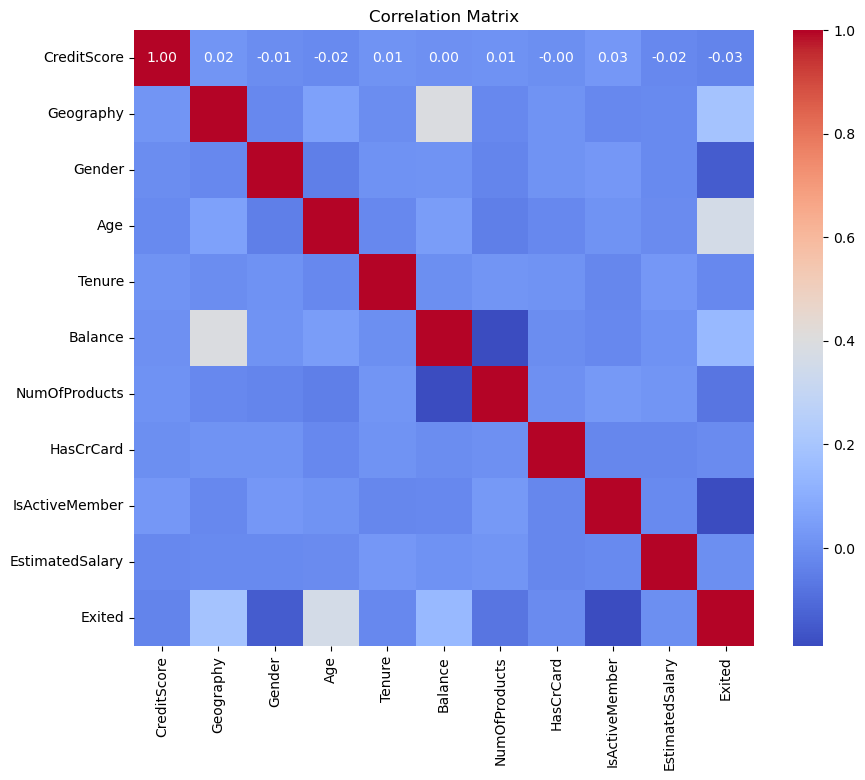

In [19]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

------

### 5. Model training

In [20]:
X = dataframe.drop('Exited', axis=1)
y = dataframe['Exited']

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(X, y, test_size=0.25, random_state=1)

#### 5.1. Decision tree

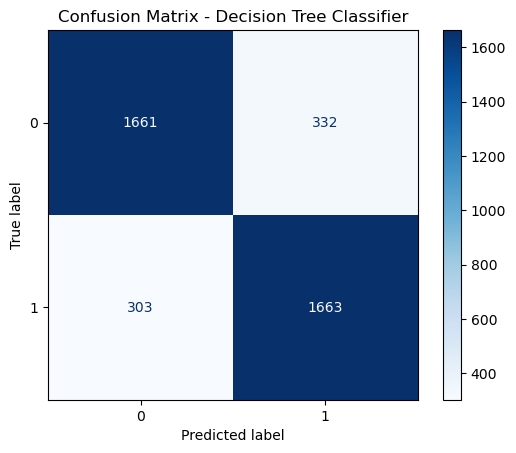

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1993
           1       0.83      0.85      0.84      1966

    accuracy                           0.84      3959
   macro avg       0.84      0.84      0.84      3959
weighted avg       0.84      0.84      0.84      3959



In [21]:
decision_tree_classifier = DecisionTreeClassifier(random_state=1)
decision_tree_classifier.fit(training_inputs, training_classes)
tree_predictions = decision_tree_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, tree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

print(classification_report(testing_classes, tree_predictions))

#### 5.2. K-Nearest Neighbors



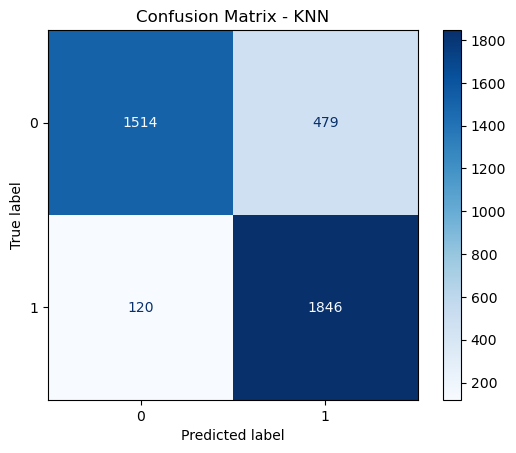

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1993
           1       0.79      0.94      0.86      1966

    accuracy                           0.85      3959
   macro avg       0.86      0.85      0.85      3959
weighted avg       0.86      0.85      0.85      3959



In [22]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(training_inputs, training_classes)
knn_predictions = knn_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()

print(classification_report(testing_classes, knn_predictions))

#### 5.3. Support Vector Machines (SVM)

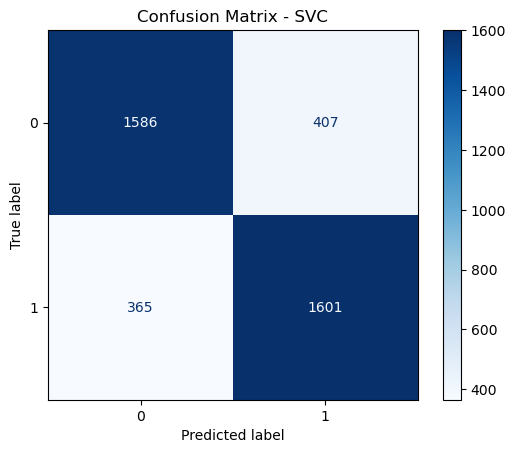

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1993
           1       0.80      0.81      0.81      1966

    accuracy                           0.81      3959
   macro avg       0.81      0.81      0.80      3959
weighted avg       0.81      0.81      0.80      3959



In [23]:
svc_classifier = SVC(random_state=1)
svc_classifier.fit(training_inputs, training_classes)
svc_predictions = svc_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, svc_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVC')
plt.show()

print(classification_report(testing_classes, svc_predictions))

#### 5.4. Naive Bayes

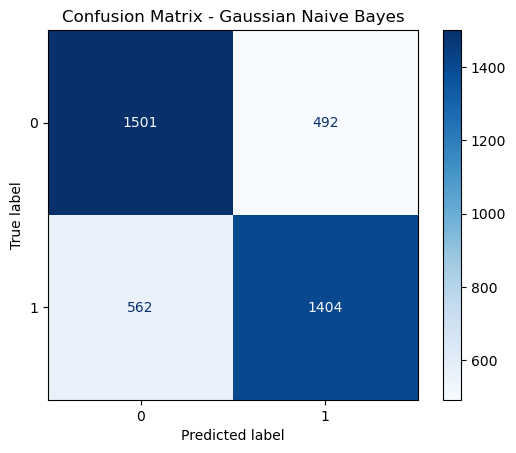

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1993
           1       0.74      0.71      0.73      1966

    accuracy                           0.73      3959
   macro avg       0.73      0.73      0.73      3959
weighted avg       0.73      0.73      0.73      3959



In [24]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(training_inputs, training_classes)
gnb_predictions = gnb_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, gnb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

print(classification_report(testing_classes, gnb_predictions))

#### 5.5. Neural Networks

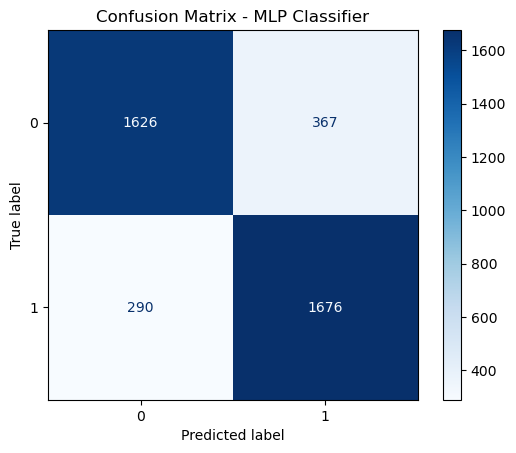

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1993
           1       0.82      0.85      0.84      1966

    accuracy                           0.83      3959
   macro avg       0.83      0.83      0.83      3959
weighted avg       0.83      0.83      0.83      3959



In [25]:
mlp_classifier = MLPClassifier(random_state=1, max_iter=1000)
mlp_classifier.fit(training_inputs, training_classes)
mlp_predictions = mlp_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, mlp_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - MLP Classifier')
plt.show()

print(classification_report(testing_classes, mlp_predictions))

----

#### 6. Hyperparameter Tuning

#### 6.1. Training and test set sizes

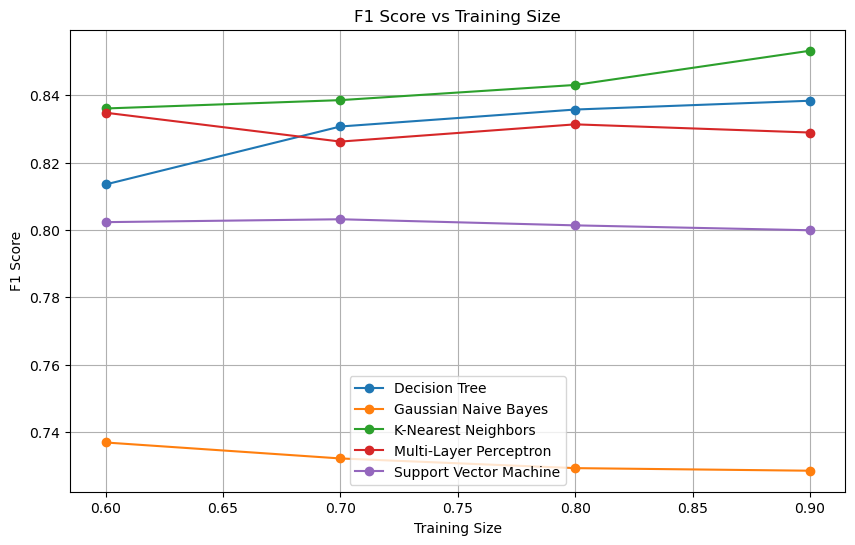

In [26]:
training_sizes = [0.6, 0.7, 0.8, 0.9]

classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multi-Layer Perceptron', MLPClassifier(random_state=1, max_iter=1000))
]

results = []

for size in training_sizes:
    (partial_training_inputs, partial_testing_inputs, partial_training_classes, partial_testing_classes) = train_test_split(X, y, train_size=size, random_state=1)
    for clf_name, clf in classifiers:
        clf.fit(partial_training_inputs, partial_training_classes)
        predictions = clf.predict(partial_testing_inputs)
        f1 = f1_score(partial_testing_classes, predictions, average='weighted')
        results.append((size, clf_name, f1))
        
results_df = pd.DataFrame(results, columns=['Training Size', 'Classifier', 'F1 Score'])
plt.figure(figsize=(10, 6))
for clf_name, group in results_df.groupby('Classifier'):
    plt.plot(group['Training Size'], group['F1 Score'], marker='o', label=clf_name)
plt.title('F1 Score vs Training Size')
plt.xlabel('Training Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

To conduct tests with different training set sizes, we defined values between 60% and 90% (anything smaller wouldn't make much sense). As expected, we noticed that the larger the training set, the better the F1-Score. Although the differences were not very noticeable overall, in the Multi-Layer Perceptron classifier, from 70% onwards, there was a significant increase. This could be attributed to various factors, such as the model's ability to learn more complex patterns, the amount of data available for training, and the model's generalization capacity. Additionally, we had to use the following configuration: ('Multi-Layer Perceptron', MLPClassifier(random_state=1)) to ensure consistent results.

#### 6.2. K-fold cross validation

Text(0.5, 1.0, 'Average score: 0.8674406011882139')

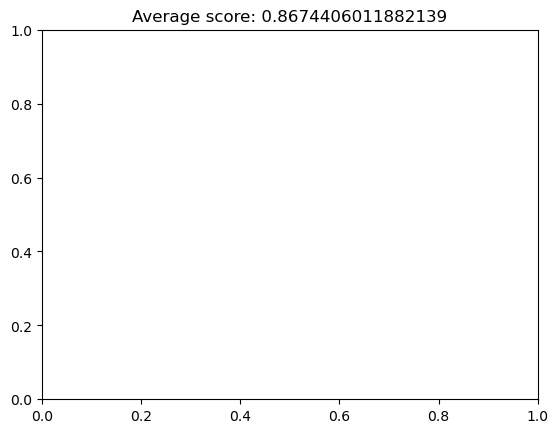

In [27]:
f1_scorer = make_scorer(f1_score, pos_label='1')
clf = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

cv_scores = cross_val_score(clf, X, y, cv=cv, scoring=f1_scorer)

mean_f1_score = np.mean(cv_scores)

plt.title('Average score: {}'.format(np.mean(cv_scores)))


#### 6.3. Balanced vs Imbalanced dataset

To test ...., 

In [28]:
datasets = ['dataset_noScale_noSmote.csv', 'dataset_scale_noSmote.csv', 'dataset_noScale_smote.csv', 'dataset_scale_smote.csv']
results = []

for dataset in datasets:
    dataframe = pd.read_csv('../dataset/' + dataset)
    X = dataframe.drop('Exited', axis=1)
    y = dataframe['Exited']
    (training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(X, y, test_size=0.25, random_state=1)
    for clf_name, clf in classifiers:
        clf.fit(training_inputs, training_classes)
        predictions = clf.predict(testing_inputs)
        f1 = f1_score(testing_classes, predictions, average='weighted')
        results.append((dataset, clf_name, f1))
        
print(results)

[('dataset_noScale_noSmote.csv', 'Decision Tree', 0.7785953427972583), ('dataset_noScale_noSmote.csv', 'K-Nearest Neighbors', 0.7085769045483179), ('dataset_noScale_noSmote.csv', 'Support Vector Machine', 0.7040008539078365), ('dataset_noScale_noSmote.csv', 'Gaussian Naive Bayes', 0.7250421949861261), ('dataset_noScale_noSmote.csv', 'Multi-Layer Perceptron', 0.17436383741307265), ('dataset_scale_noSmote.csv', 'Decision Tree', 0.7827609009134985), ('dataset_scale_noSmote.csv', 'K-Nearest Neighbors', 0.8117571970066172), ('dataset_scale_noSmote.csv', 'Support Vector Machine', 0.83833821371308), ('dataset_scale_noSmote.csv', 'Gaussian Naive Bayes', 0.8036703628912931), ('dataset_scale_noSmote.csv', 'Multi-Layer Perceptron', 0.8400311586152294), ('dataset_noScale_smote.csv', 'Decision Tree', 0.7925431667720837), ('dataset_noScale_smote.csv', 'K-Nearest Neighbors', 0.6814622765350465), ('dataset_noScale_smote.csv', 'Support Vector Machine', 0.554102765748721), ('dataset_noScale_smote.csv', 

It's quite evident that the results of a model trained on imbalanced datasets are significantly more effective in predicting class 0 than class 1. This discrepancy can be explained by the difference in the amount of data available for each class. There are many more examples of class 0 (around 8000) than class 1 (around 2000), leading to a bias of the model towards the majority class.

#### 6.4. Decision tree criterias

In [38]:
parameter_grid = {'criterion': ['gini', 'entropy']}

decision_tree_classifier = DecisionTreeClassifier(random_state=1)

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1_weighted')

grid_search.fit(training_inputs, training_classes)

best_criteria = grid_search.best_params_['criterion']

best_classifier = grid_search.best_estimator_
predictions = best_classifier.predict(testing_inputs)

f1 = f1_score(testing_classes, predictions, average='weighted')

# Print the best results
best_results = []
best_results.append(("Decision tree", f1))
print("The best f1 score:", round(f1 * 100, 2), "%")
print("The best criteria:", best_criteria)

The best f1 score: 84.26 %
The best criteria: entropy


#### 6.5. K-nearest neighbors proximity metric

In [30]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
n_neighbors = [3, 5, 7, 9, 11]
results = []

for metric in metrics:
    for n in n_neighbors:
        knn_classifier = KNeighborsClassifier(metric=metric, n_neighbors=n)
        knn_classifier.fit(training_inputs, training_classes)
        predictions = knn_classifier.predict(testing_inputs)
        f1 = f1_score(testing_classes, predictions, average='weighted')
        results.append((f1, metric, n))

best = max(results, key=lambda x: x[0])
best_results.append(("KNNeighbors", best[0]))
print("The best f1 score :", round(best[0] * 100, 2), "%")
print("The best metric :", best[1])
print("The best n_neighbors :", best[2])

The best f1 score : 86.78 %
The best metric : manhattan
The best n_neighbors : 3


#### 6.6. SVM kernel function

In [31]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel, random_state=1)
    svc_classifier.fit(training_inputs, training_classes)
    predictions = svc_classifier.predict(testing_inputs)
    f1 = f1_score(testing_classes, predictions, average='weighted')
    results.append((f1, kernel))
    
best = max(results, key=lambda x: x[0])
best_results.append(("SVC", best[0]))
print("The best f1 score :", round(best[0] * 100, 2), "%")
print("The best kernel function :", best[1])

The best f1 score : 80.5 %
The best kernel function : rbf


#### 6.7. Neural networks activation functions and optimizers

In [32]:
activations = ['logistic', 'tanh', 'relu']
optimizers = ['adam', 'sgd']
learning_rates = ['constant', 'adaptive']
results = []

for learning_rate in learning_rates: 
    for activation in activations:
        for optimizer in optimizers:
            mlp_classifier = MLPClassifier(learning_rate=learning_rate, solver=optimizer, max_iter=1000,  random_state=1)
            mlp_classifier.fit(training_inputs, training_classes)
            predictions = mlp_classifier.predict(testing_inputs)
            f1 = f1_score(testing_classes, predictions, average='weighted')
            results.append((f1, learning_rate, activation, optimizer))
            
best = max(results, key=lambda x: x[0])
best_results.append(("Neural Network", best[0]))
print("The best f1 score :", round(best[0] * 100, 2), "%")
print("Learning rate :", best[1])
print("Activation function :", best[2])
print("Optimizer :", best[3])


The best f1 score : 83.4 %
Learning rate : constant
Activation function : logistic
Optimizer : adam


-----

### 7. Results and conclusions

In [33]:
print(best_results)

[('Decision tree', 0.8426142570637924), ('KNNeighbors', 0.8677562857108766), ('SVC', 0.8049934249033203), ('Neural Network', 0.8340082324461104)]


After conducting thorough analysis, model training, and hyperparameter tuning, we concluded that the **K-Nearest Neighbors (KNN) classifier** is the best performing model for this dataset. The optimal configuration for the KNN model, which yielded the highest F1 score of 86.7%, was achieved using the Manhattan distance metric and setting the number of neighbors (n_neighbors) to 3. 

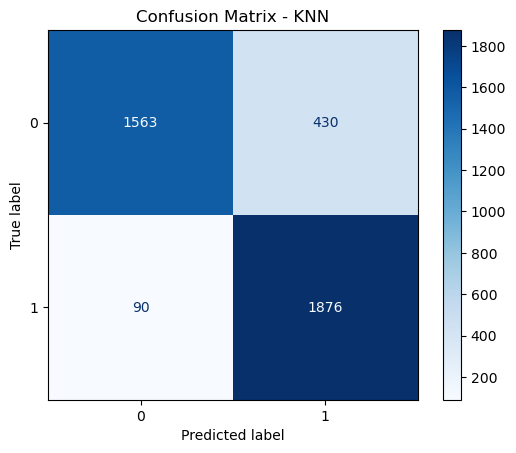

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1993
           1       0.81      0.95      0.88      1966

    accuracy                           0.87      3959
   macro avg       0.88      0.87      0.87      3959
weighted avg       0.88      0.87      0.87      3959



In [34]:
knn_classifier = KNeighborsClassifier(metric="manhattan", n_neighbors=3)
knn_classifier.fit(training_inputs, training_classes)
predictions = knn_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()

print(classification_report(testing_classes, predictions))

Close behind was the Decision Tree classifier, which demonstrated an impressive F1 score of 84.4%. 

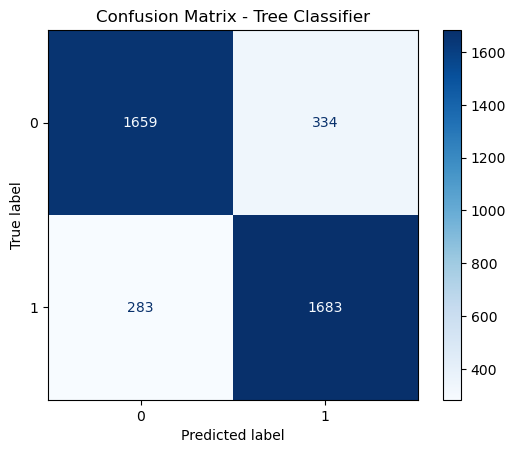

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1993
           1       0.83      0.86      0.85      1966

    accuracy                           0.84      3959
   macro avg       0.84      0.84      0.84      3959
weighted avg       0.84      0.84      0.84      3959



In [35]:
tree_classifier = DecisionTreeClassifier(criterion='entropy')
tree_classifier.fit(training_inputs, training_classes)
predictions = tree_classifier.predict(testing_inputs)

cm = confusion_matrix(testing_classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Tree Classifier')
plt.show()

print(classification_report(testing_classes, predictions))

#### 7.1. Visualize the decision tree 

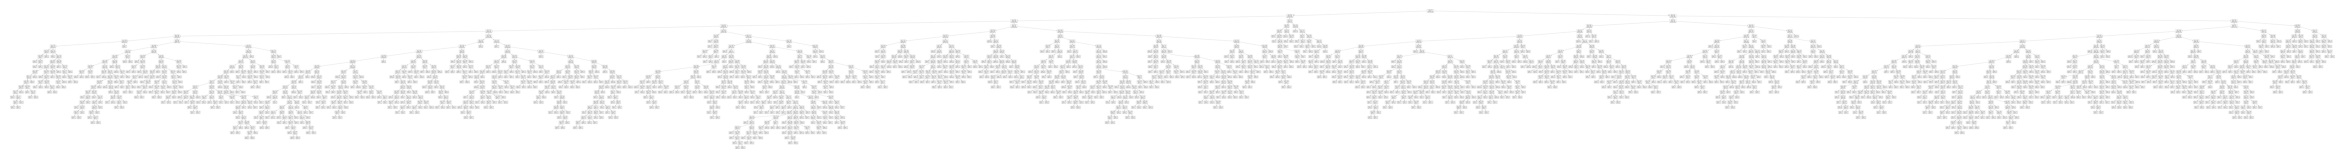

In [55]:
import sklearn.tree as tree
import matplotlib.image as mpimg


with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(best_classifier, out_file=out_file)

img = mpimg.imread('iris_dtc.png')

plt.figure(figsize=(30, 30))

plt.imshow(img)
plt.axis('off') 
plt.show()